In [1]:
import scipy

In [2]:
dir(scipy)

['LowLevelCallable',
 '__numpy_version__',
 '__version__',
 'cluster',
 'fft',
 'fftpack',
 'integrate',
 'interpolate',
 'io',
 'linalg',
 'misc',
 'ndimage',
 'odr',
 'optimize',
 'show_config',
 'signal',
 'sparse',
 'spatial',
 'special',
 'stats',
 'test']

In [6]:
import scipy.stats
print(len(dir(scipy.stats)))
dir(scipy.stats)

325


['ConstantInputWarning',
 'DegenerateDataWarning',
 'FitError',
 'NearConstantInputWarning',
 'NumericalInverseHermite',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_common',
 '_constants',
 '_continuous_distns',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_hypotests_pythran',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multivariate',
 '_mvn',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_tukeylambda_stats',
 '_unuran',
 '_variation',
 '_warnings_errors',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsi

### 다음 데이터의 정규성을 검증하라

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

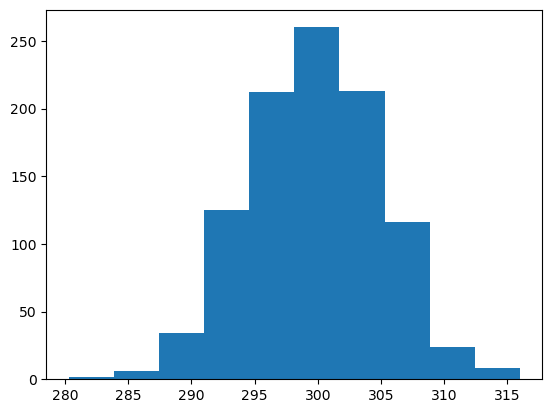

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [43]:
from scipy.stats import shapiro
sp = shapiro(df)
print(sp)
print(sp.pvalue, sp.statistic)

ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)
0.34849318861961365 0.9981444478034973


In [26]:
help(shapiro)

Help on function shapiro in module scipy.stats._morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is accurate
    but the p-value may not be.
    
    The chance of rejecting the null hypothesis when it is true is close to 5%
    regardless of sample size.
    
    References
    ----------
    .. [1] https://www.itl.nist

In [44]:
if sp.pvalue > 0.05:
    print(sp.pvalue, '값이 유의수준 5%에서 귀무가설을 기각할 수 없습니다. (위 데이터는 정규분포를 따름닌다.)' )
else:
    print(sp.pvalue, '값이 유의수준 5%을 벗어나므로 귀무가설을 기각합니다. (위 데이터는 정규분포를 따르지 않습니다.)' )

0.34849318861961365 값이 유의수준 5%에서 귀무가설을 기각할 수 없습니다. (위 데이터는 정규분포를 따름닌다.)


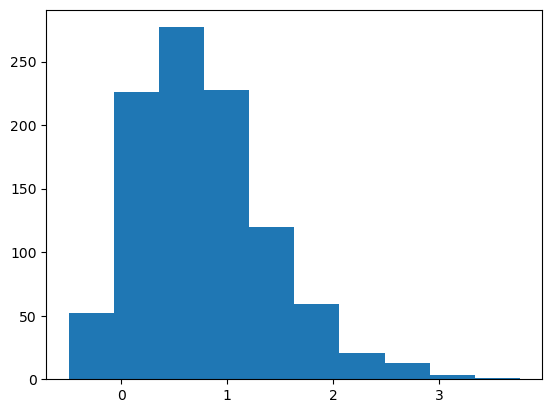

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [46]:
sp = shapiro(df)
print(sp)

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


In [47]:
if sp.pvalue > 0.05:
    print(sp.pvalue, '값이 유의수준 5%에서 귀무가설을 기각할 수 없습니다. (위 데이터는 정규분포를 따름닌다.)' )
else:
    print(sp.pvalue, '값이 유의수준 5%에서 귀무가설인 "정부규포를 따름니다."를 기각하고 대립가설을 채택합니다. (위 데이터는 정규분포를 따르지 않습니다.)' )

2.309641794969743e-16 값이 유의수준 5%에서 귀무가설인 "정부규포를 따름니다."를 기각하고 대립가설을 채택합니다. (위 데이터는 정규분포를 따르지 않습니다.)


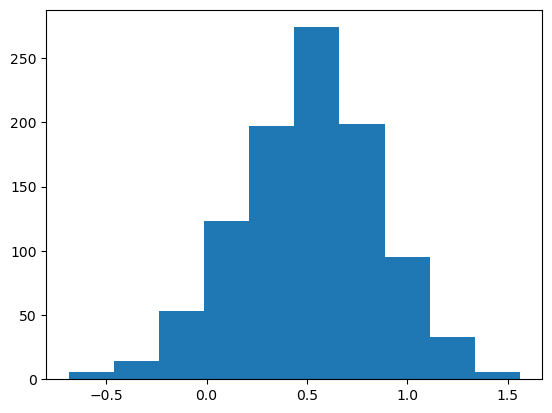

In [48]:
# 위의 데이터를 log변환 한 후에 정규성을 가지는지 확인하라

import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
df = np.log1p(df)
plt.hist(df)
plt.show()

In [56]:
sp = shapiro(df)
print(sp)

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)


c:\Users\sujung\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
if sp.pvalue > 0.05:
    print("정규분포를 따름니다.")
else:
    print('정규분포를 따르지 않습니다.')

정규분포를 따름니다.


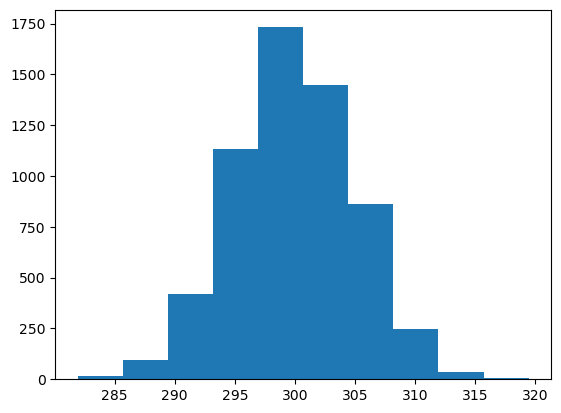

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [53]:
sp = shapiro(df)
print(sp)

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)


In [54]:
if sp.pvalue > 0.05:
    print('정규분포를 따름니다.')
else:
    print('정규분포를 따르지 않습니다.')

정규분포를 따름니다.


In [55]:
df.shape

(6000, 1)

In [59]:
df.head()

,data
0,296.016803
1,299.628476
2,298.232057
3,293.256749
4,301.037710


In [57]:
from scipy.stats import anderson

In [61]:
ad = anderson(df.data)
ad

AndersonResult(statistic=0.8266993530396576, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [65]:
if ad.statistic < ad.critical_values[2]:
    print('정귭분포를 따름니다.')
else: 
    print('정규분포를 따르지 않습니다.')

정규분포를 따르지 않습니다.


### 단일 표본 t검정 (one-sample)

#### 100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
#### 그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

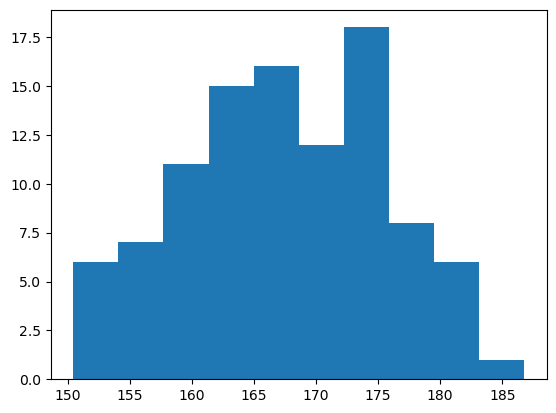

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
plt.hist(df)
plt.show()

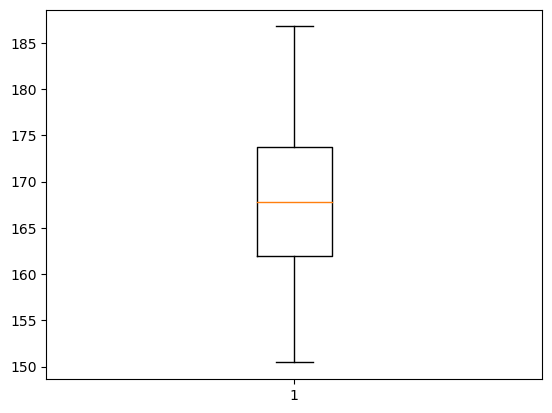

In [70]:
plt.boxplot(df)
plt.show()

In [77]:
from scipy.stats import ttest_1samp
from scipy.stats import wilcoxon

In [83]:
sp = shapiro(df)
print(sp)
print()
print('샤피로 정규성 검정 p-value' , sp.pvalue, ' 이므로')
if sp.pvalue > 0.05:
    print('귀무가설을 기각하지 않습니다. 정규성을 만족하므로 단일표본 검정으로 확인한다.\n')
    print('단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다"이며, 대립가설은 "100명 키의 평균은 165가 아니다." 이다')

    # 단일표본 t 검정
    tt1 = ttest_1samp(df.height, 165)
    # print(tt1)
    print()
    if tt1.pvalue > 0.05 :
        print(f'검정결과 p-value = {tt1.pvalue} 이므로 유의수준 5%에서 귀무가설을 기각하지 않습니다.(귀무가설 채택)')
    else:
        print(f'검정결과 p-value = {tt1.pvalue} 이므로 유의수준 5%에서 귀무가설을 기각합니다. (대립가설 채택)')
    
else :
    print('귀무가설을 기각합니다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕스 순위 부호 검정을 진행한다.\n')
    print('윌콕스 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다."이며, 대립가설은 "100명 키의 평균은 165가 아니다." 이다.')

    # 윌콕스 순위 부호 검정
    wc = wilcoxon(df.height - 165)
    if wc.pvalue > 0.05 : 
        print(f'검정결과 p-value = {wc.pvalue} 이므로 귀무가설을 기각하지 않습니다. (귀무가설 채택)')
    else:
        print(f'검정결과 p-value = {wc.pvalue} 이므로 귀무가설을 기각하고 대립가설 채택합니다.')

    

ShapiroResult(statistic=0.9872668981552124, pvalue=0.4558176100254059)

샤피로 정규성 검정 p-value 0.4558176100254059  이므로
귀무가설을 기각하지 않습니다. 정규성을 만족하므로 단일표본 검정으로 확인한다.

단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다"이며, 대립가설은 "100명 키의 평균은 165가 아니다." 이다

검정결과 p-value = 0.0018367171548080209 이므로 유의수준 5%에서 귀무가설을 기각합니다. (대립가설 채택)


In [84]:
# 100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
# 그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')
df.head()

,height
0,182.012475
1,166.857081
2,159.633265
3,159.633265
4,169.428478


In [85]:
sp = shapiro(df)
if sp.pvalue > 0.05:
    print('정규성을 따른다.')
    print('t-test 검정을 실시하여 귀무가설은 "100명 키의 평균은 165이다."이고, 대립가설은 "100명 키의 평균은 165가 아니다." 이다.')
    ts = ttest_1samp(df.height, 165)
    if ts.pvalue > 0.05 :
        print(f'p-value = {ts.pvalue}  귀무가설 채택')
    else:
        print(f'p-value = {ts.pvalue}  대립가설 채택')
else:
    print('정규성을 따르지 않는다.')
    print('윌콕스 순위 부호 검정을 실시하여 귀무가설은 "100명 키의 평균은 165이다."이고, 대립가설은 "100명 키의 평균은 165가 아니다." 이다.')
    wc = wilcoxon(df.height - 165)
    if wc.pvalue > 0.05:
        print(f'p-value = {wc.pvalue} 귀무가설 채택')
    else :
        print(f'p-value = {wc.pvalue} 대립가설 채택')

정규성을 따르지 않는다.
윌콕스 순위 부호 검정을 실시하여 귀무가설은 "100명 키의 평균은 165이다."이고, 대립가설은 "100명 키의 평균은 165가 아니다." 이다.
p-value = 0.04880534424649582 대립가설 채택


### 등분산 검정

#### 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [92]:
df['class'].unique(), df.shape

(array(['A', 'B'], dtype=object), (480, 2))

In [93]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

In [96]:
a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(bartlett(a, b))

print(fligner(a, b, center='median'))
print(fligner(a, b, center='mean'))

print(levene(a, b, center='median'))
print(levene(a, b, center='mean'))

print('p-value 값이 모두 0.05 보다 크므로 귀무가설을 기각할 수 없다. 귀무가설 채택(각 그룹은 등분산이다.)')

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


In [97]:
# 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78


In [101]:
a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(bartlett(a, b))

print(fligner(a, b, center='median'))
print(fligner(a, b, center='mean'))

print(levene(a, b, center='median'))
print(levene(a, b, center='mean'))

BartlettResult(statistic=1.5116783794562305, pvalue=0.2188831590902503)
FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615564)
FlignerResult(statistic=4.94724457924667, pvalue=0.026132286002684912)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)
LeveneResult(statistic=4.342327020297874, pvalue=0.0377066528874248)


In [103]:
# 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [108]:
a = df['A']
b = df['B']

print(bartlett(a, b))
print(fligner(a, b, center='median'))
print(fligner(a, b, center='mean'))
print(levene(a, b, center='median'))
print(levene(a, b, center='mean'))

BartlettResult(statistic=2.383217881104806, pvalue=0.12264468401742169)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
FlignerResult(statistic=6.08420814282746, pvalue=0.01363954875460099)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)
LeveneResult(statistic=5.783103950473267, pvalue=0.016687980542371833)


In [109]:
# 두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [112]:
df.isna().sum()

A      0
B    120
dtype: int64

In [118]:
a = df['A']
b = df['B']

print(bartlett(a, b))
print(bartlett(a, b.dropna()))
print()

print(fligner(a, b, center='median'))
print(fligner(a, b.dropna(), center='median'))
print(fligner(a, b, center='mean'))
print(fligner(a, b.dropna(), center='mean'))
print()

print(levene(a, b, center='median'))
print(levene(a, b.dropna(), center='median'))
print(levene(a, b, center='mean'))
print(levene(a, b.dropna(), center='mean'))

BartlettResult(statistic=4.119254834772108, pvalue=0.04239774936707851)
BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)

FlignerResult(statistic=372.546422798273, pvalue=5.22112391778621e-83)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)
FlignerResult(statistic=68.23491428167205, pvalue=1.4513312956560552e-16)
FlignerResult(statistic=7.866701415553152, pvalue=0.005035342411464087)

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=8.217541809462276, pvalue=0.004331841625789694)


### 독립표본 검정 (Independent)

### 1. 데이터가 정규성을 가지는 경우(모수적 검정)
    - 두 집단의 등분산 검정을 한 후
    1) 등분산일 경우 (equal_var = True)
    2) 등분산이 아닐 경우 (equal_var = False, welch t-test)

### 2. 데이터가 정규성을 가지지 않는 경우(비모수적 검정)

In [119]:
# 두개 학급의 시험성적에 대한 데이터이다. 
# 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


In [125]:
df1.shape, df2.shape

((100, 1), (100, 1))

In [124]:
# 1. 각각의 학급에 대해서 정규성 검사를 한다.
# 개수가 많지 않으므로 샤피로 검정을 실시한다.
df1_sp = shapiro(df1)
df2_sp = shapiro(df2)
print(df1_sp)
print(df2_sp)
print('둘 다 정규성을 가진다.')

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)
둘 다 정규성을 가진다.


In [133]:
# 2. 정규성이므로 등분산 검사를 실시한다.

print(bartlett(df1.data, df2.data))
print(fligner(df1.data, df2.data, center='mean'))
print(levene(df1.data, df2.data, center='median'))
print('p-value값을 0.05보다 큰 경우가 많으므로 귀무가설을 기각하지 못하다. 즉 등분산을 갖는다.')


BartlettResult(statistic=4.170597307474754, pvalue=0.04113129672708929)
FlignerResult(statistic=2.3555639709996057, pvalue=0.12483673059701819)
LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)
p-value값을 0.05보다 큰 경우가 많으므로 귀무가설을 기각하지 못하다. 즉 등분산을 갖는다.


In [139]:
# 3. 등분산일 경우 독립표본 검정
from scipy.stats import ttest_ind

tti = ttest_ind(df1, df2, equal_var=True )
print(tti)
print(tti.pvalue, '이므로 귀무가설 기각하고 대립가설 채택 즉 두 학습의 시험 평균을 동일하지 않다.')


Ttest_indResult(statistic=array([2.76719074]), pvalue=array([0.00619015]))
[0.00619015] 이므로 귀무가설 기각하고 대립가설 채택 즉 두 학습의 시험 평균을 동일하지 않다.


### 두개 학급의 시험성적에 대한 데이터이다. 
### 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

In [141]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.isna().sum()



A      0
B    120
dtype: int64

In [148]:
# 1. 정규성 검사를 실시
print(shapiro(df.A))
print(shapiro(df.B.dropna()))
print('B 그룹이 정규성을 띄지 않는다. 비모수 검정을 실시한다.')

ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)
ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)
B 그룹이 정규성을 띄지 않는다. 비모수 검정을 실시한다.


In [154]:
# 2. 비모수 검정 실시
from scipy.stats import mannwhitneyu
from scipy.stats import ranksums

print(mannwhitneyu(df.A, df.B.dropna()))
print(ranksums(df.A, df.B.dropna()))
print('귀무가설 채택, 두 그룹간의 시험 평균은 동일하다 말 할 수 있다.')

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)
귀무가설 채택, 두 그룹간의 시험 평균은 동일하다 말 할 수 있다.


### 두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

In [159]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   190 non-null    object 
 1   data    190 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [160]:
df_a = df[df.group == 'a']
df_b = df[df.group == 'b']

In [164]:
# 1. 정규성 검사
print(shapiro(df_a.data))
print(shapiro(df_b.data))
print('둘 다 p-value 값이 0.05보다 크므로 정규성을 띈다.')

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831852316856384, pvalue=0.4701973497867584)
둘 다 p-value 값이 0.05보다 크므로 정규성을 띈다.


In [168]:
# 2. 등분산 검사
print(bartlett(df_a.data, df_b.data))
print(fligner(df_a.data, df_b.data, center='median'))
print(levene(df_a.data, df_b.data, center='mean'))

print('모두 p-value 값이 0.05보다 작으므로 등분산성을 띄지 않는다.')


BartlettResult(statistic=4.527245852831357, pvalue=0.03335926358531406)
FlignerResult(statistic=6.116095465056764, pvalue=0.01339563676982482)
LeveneResult(statistic=6.0448405973286246, pvalue=0.014852059669056625)
모두 p-value 값이 0.05보다 작으므로 등분산성을 띄지 않는다.


In [170]:
# 3. 등분산이 아닐 경우
print(ttest_ind(df_a.data, df_b.data, equal_var=False))
print('귀무가설 기각, 평균은 동일하다고 보기 어렵다.')


Ttest_indResult(statistic=-2.1949470315829265, pvalue=0.029512802991767898)
귀무가설 기각, 평균은 동일하다고 보기 어렵다.


### 두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')
df.isna().sum()

a     0
b    50
dtype: int64

In [173]:
# 1. 정규성 검사
print(shapiro(df.a))
print(shapiro(df.b))
print(shapiro(df.b.dropna()))
print('정규성을 갖는다.')

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=nan, pvalue=1.0)
ShapiroResult(statistic=0.9854326844215393, pvalue=0.5937624573707581)


In [175]:
# 2. 등분산 검사
print(bartlett(df.a, df.b.dropna()))
print(fligner(df.a, df.b.dropna()))
print(levene(df.a, df.b.dropna()))
print('등분산성을 갖는다고 말할 수 없다.')

BartlettResult(statistic=3.5459493364964523, pvalue=0.059691000498177604)
FlignerResult(statistic=4.387886502894593, pvalue=0.03619515515941132)
LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)


In [177]:
# 3. true
print(ttest_ind(df.a, df.b.dropna(), equal_var=False))
print('두 그룹의 평균은 동일하다고 말할 수 있다.')

Ttest_indResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704)
두 그룹의 평균은 동일하다고 말할 수 있다.


### 대응표본 t 검정 (paired)

#### 특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')
df.head()

,before,after
0,216.289726,175.897620
1,190.279454,189.295934
2,217.744689,219.233935
3,235.021264,195.021021
4,234.098484,213.218227


In [181]:
# 1. 정규성 검사
print(shapiro(df.before))
print(shapiro(df.after))
print('정규성을 가짐')

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)
정규성을 가짐


In [184]:
# 2. 등분산성 검사
print(levene(df.before, df.after, center='mean'))
print('등분산성을 가짐')


LeveneResult(statistic=0.07992405348019711, pvalue=0.7776460750812457)
등분산성을 가짐


In [185]:
from scipy.stats import ttest_rel

print(ttest_rel(df.before, df.after))
print('귀무가설을 차이가 없다. 대립가설은 차이가 있다.')
print('대립가설 채택 변화가 있다.')

Ttest_relResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513)


In [188]:
# 특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')
df.head()


,before,after
0,253.566615,220.857837
1,195.080189,209.206667
2,228.299690,173.070057
3,279.417367,222.356980
4,230.062210,248.371045


In [193]:
print(shapiro(df.before))
print(shapiro(df.after))
print('둘다 정규성을 갖는다.')
print()
print(levene(df.before, df.after, center='mean'))
print('등분산성이다.')
print()
print(ttest_rel(df.before, df.after))
print('귀무가설 채택, 차이가 없다.')

ShapiroResult(statistic=0.9920631051063538, pvalue=0.7270199656486511)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229290008544922)
둘다 정규성을 갖는다.

LeveneResult(statistic=1.321242871013592, pvalue=0.25152289343137324)
등분산성이다.

Ttest_relResult(statistic=0.188900575991026, pvalue=0.8504925317234707)
귀무가설 채택, 차이가 없다.


In [195]:
# 특정 집단의 학습 전후 시험 성적 변화를 나타낸 데이터이다. 시험 전과 후에 차이가 있는지 검정하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')
df.isna().sum()

before    0
after     0
dtype: int64

In [200]:
print(shapiro(df.before))
print(shapiro(df.after))
print('정규성을 띄지 않는다. 비모수검정 실시 윌콕슨 부호순위 검정 실시')

# print(mannwhitneyu(df.before, df.after))
print(wilcoxon(df.before, df.after))
print('귀무가설 채택 시험 전과 후가 차이가 없다.')

ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)
ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)
정규성을 띄지 않는다. 비모수검정 실시 윌콕슨 부호순위 검정 실시
WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


In [201]:
# 한 기계 부품의 rpm 수치를 두가지 다른 상황에서 측정했다.
# (총 70세트) b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')
df.head()

,rpm,group
0,474.551593,a
1,450.548420,a
2,563.720934,a
3,506.886966,a
4,471.724049,a


In [204]:
a = df[df.group == 'a']
b = df[df.group == 'b']

In [217]:
print(shapiro(a.rpm))
print(shapiro(b.rpm))
print('둘다 정규성을 띈다.')
print()

print(levene(b.rpm, a.rpm, center='median'))
print('등분산성을 띄움')
print()

print(ttest_rel(a.rpm, b.rpm, alternative='greater'))
print('귀무가설 채택, 크다고 할 수 있다.')

# 정규성을 가짐 , 등분산성 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지않음, 
# a,b,alternative='greater' 의 의미는 a > b가 대립가설이 된다는 것이다. p-value는 0.96으로
# 귀무가설인 a<=b를 기각하지 못한다. 그러므로 b상황이 a 상황보다 rpm 값이 크다고 이야기 할수 있다.

ShapiroResult(statistic=0.9907217025756836, pvalue=0.8884284496307373)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)
둘다 정규성을 띈다.

LeveneResult(statistic=0.06716114122680159, pvalue=0.7959020864923277)
등분산성을 띄움

Ttest_relResult(statistic=-1.9018108294460812, pvalue=0.9693143365355352)
귀무가설 채택, 크다고 할 수 있다.


### 카이제곱 검정 (교차분석)

#### 144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라

In [220]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')
df.isna().sum()


dice_number    0
counts         0
dtype: int64

In [226]:
df

,dice_number,counts
0,1,24
1,2,20
2,3,28
3,4,22
4,5,28
5,6,22


In [229]:
# 각 눈금의 기댓값은 counts.sum() / 6 
df['expected'] = (df.counts.sum() / 6).astype(int)
df

,dice_number,counts,expected
0,1,24,24
1,2,20,24
2,3,28,24
3,4,22,24
4,5,28,24
5,6,22,24


In [231]:
from scipy.stats import chisquare
print(chisquare(df.counts, df.expected))
print('귀무가설 기각할 수 없다. : 각 주사위 눈금의 발생비율은 동일하다')

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)
귀무가설 기각할 수 없다. : 각 주사위 눈금의 발생비율은 동일하다


In [232]:
# 다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 
# 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.
# 이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [235]:
df.isna().sum()

hands    0
dtype: int64

In [245]:
df_tmp = df.groupby('hands').size().to_frame('counts').reset_index()

df_tmp['expected'] = [int(df_tmp.counts.sum() * 0.2), int(df_tmp.counts.sum() * 0.8)]
df_tmp

,hands,counts,expected
0,left,80,100
1,right,420,400


In [247]:
print(chisquare(df_tmp.counts, df_tmp.expected))
print('귀무가설 기각')
print('귀무가설 : 왼손과 오른손 잡이의 비율이 0.2:0.8 이다. ')
print('왼손과 오른손 잡이의 비율이 0.2:0.8 로 볼 수가 없다. ')

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)
귀무가설 기각
귀무가설 : 왼손과 오른손 잡이의 비율이 0.2:0.8 이다. 
왼손과 오른손 잡이의 비율이 0.2:0.8 로 볼 수가 없다. 


In [248]:
# 다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [250]:
df_tmp = pd.crosstab(df.측정회원성별, df.등급)
df_tmp

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


In [256]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(df_tmp)
print(p)
print('귀무가설 : 성별과 등급이 독립이다.')
print('귀무가설 기각 대립가설 채택')
print('성별과 등급이 독립적이지 않다. 관련이 있다고 볼 수 있다.')

7.481892813401677e-26
귀무가설 : 성별과 등급이 독립이다.
귀무가설 기각 대립가설 채택
성별과 등급이 독립적이지 않다. 관련이 있다고 볼 수 있다.


In [257]:
# 성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [261]:
df_tmp = df.iloc[:-1, :-1]
df_tmp

,불참,참석
남성,4,2
여성,1,9


In [262]:
chi2_contingency(df_tmp)

(3.277575757575758,
 0.07023259819117404,
 1,
 array([[1.875, 4.125],
        [3.125, 6.875]]))

In [264]:
from scipy.stats import fisher_exact
print(fisher_exact(df_tmp))
print('귀무가설 성별과 참석간은 독립이다. 관련이 없다.')
print('귀무가설 기각, 대립가설 채택 독립적이지 않다. 관련이 있다.')

(18.0, 0.03571428571428571)